### Import

In [2]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.stats import multivariate_normal as mnorm
from mpl_toolkits import mplot3d
from matplotlib import font_manager as fm, rcParams

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font in fontlist:
    if 'comic' in font.lower():
        print(font)

/System/Library/Fonts/Supplemental/Comic Sans MS.ttf
/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf


### Create a asymmetrical distribution of days exercised and BMI

In [4]:
exercise_mean = 20
exercise_var = 8
exercise_std = np.sqrt(exercise_var)
exercise_domain = [0,exercise_mean+20]
bmi_mean = 24
bmi_var = 4**2
bmi_std = np.sqrt(bmi_var)
bmi_domain = [0,bmi_mean+20]
rv_exercise_bmi = mnorm([exercise_mean,bmi_mean], [[exercise_var,-7], [-7, bmi_var]])

### Create Levels and Colors

In [5]:
std_range = np.linspace(-2,0,11)
levels_exercise_bmi = []
for std_val in std_range:
    prob_std = rv_exercise_bmi.pdf([
        exercise_mean + (exercise_std*std_val),
        bmi_mean + (bmi_std*std_val)])
    levels_exercise_bmi.append(prob_std)
colors_exercise_bmi = np.zeros((len(levels_exercise_bmi),3)) + 0.6
colors_exercise_bmi[5,:] = [0,0,0]
colors_exercise_bmi[0,:] = [0,0,0]

### Create Contour Plot

In [6]:
resolution = 111
[X,Y] = np.meshgrid(
    np.linspace(
        exercise_domain[0],
        exercise_domain[1],
        resolution),
    np.linspace(
        bmi_domain[0],
        bmi_domain[1],
        resolution))
XY = np.vstack((X.flatten(),Y.flatten())).T
P = rv_exercise_bmi.pdf(XY)
P = np.reshape(P,(resolution,resolution))
N = rv_exercise_bmi.rvs(200)
C = np.zeros((200,3))
C[:,0] = 0.3
C[:,1] = 0.6
C[:,2] = 0.9

### Plot

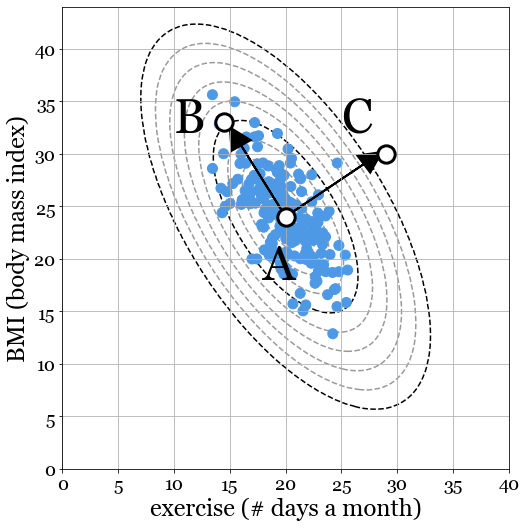

In [7]:
plt.figure(figsize=(8,8.5))
plt.contour(P,levels_exercise_bmi,extent=(exercise_domain[0],exercise_domain[1],bmi_domain[0],bmi_domain[1]),
            colors=colors_exercise_bmi,
            linestyles='dashed',
            zorder=-100);
plt.scatter(exercise_mean,bmi_mean,c='k',marker='+',s=100)
plt.scatter(N[:,0],N[:,1],c=C,s=100)
plt.grid();
plt.xlabel('exercise (# days a month)',fontsize=24,**csfont);
plt.ylabel('BMI (body mass index)',fontsize=24,**csfont);
plt.xticks(fontsize=18,**csfont);
plt.yticks(fontsize=18,**csfont);
plt.axis((exercise_domain[0],exercise_domain[1],bmi_domain[0],bmi_domain[1]))

plt.scatter(exercise_mean-5.5,bmi_mean+9,s=300,zorder=1000,linewidth=3,edgecolor='k',facecolor='w')
plt.arrow(exercise_mean,bmi_mean,-5,+8.5,
          length_includes_head = True,head_width = 2,head_length = 2,
          shape = 'full',head_starts_at_zero = False,
          facecolor = 'k',edgecolor = 'k',linewidth=2)
txt = plt.text(exercise_mean-10,bmi_mean+8,'B',c=(0,0,0),fontsize=48,**csfont);

plt.scatter(exercise_mean,bmi_mean,s=300,zorder=1000,linewidth=3,edgecolor='k',facecolor='w')
txt = plt.text(exercise_mean-2,bmi_mean-6,'A',c=(0,0,0),fontsize=48,**csfont);

plt.scatter(exercise_mean+9,bmi_mean+6,s=300,zorder=1000,linewidth=3,edgecolor='k',facecolor='w')
plt.arrow(exercise_mean,bmi_mean,7,5,
          length_includes_head = False,head_width = 2,head_length = 2,
          shape = 'full',head_starts_at_zero = False,
          facecolor = 'k',edgecolor = 'k',linewidth=2)
txt = plt.text(exercise_mean+5,bmi_mean+8,'C',c=(0,0,0),fontsize=48,**csfont);
plt.savefig('../../assets/figures/012/012_distribution_03.png',dpi=300,bbox_inches="tight");